# Deep Learning Assignment 2: Sequence Learning

Importing Relevant libraries here, also displaying information about device components, and the keras and tensorflow versions being used

In [1]:
# Keras
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras import backend as K
from keras import regularizers

# Tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

from sklearn.model_selection import train_test_split

print('Keras version:', keras.__version__)
print('Tensorflow Version:', tf.__version__)

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6902762206321660273
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7049546957
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4873822284741640628
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060 SUPER, pci bus id: 0000:09:00.0, compute capability: 7.5"
]
Keras version: 2.3.1
Tensorflow Version: 2.1.0


In [2]:
import numpy as np
np.set_printoptions(precision = 3, suppress = True) # formats the output of np arrays to look nicer
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
# Make graph stand out so it can be read even when using a dark theme
plt.rcParams.update({
    "figure.facecolor": "white"
})
import os
import csv
import pandas as pd

Functions for plotting performance and loss

In [3]:
# function for plotting performance of the network
def plot_performance(name,history):
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']

    epochs = range(1,len(acc)+1)

    # plot the accuracy and loss using matplot
    plot_accuracy(name,epochs,acc,val_acc)
    plot_loss(name,epochs,loss,val_loss)
 

# function for plotting training and validation accuracy
def plot_accuracy(name,epochs,acc,val_acc):
    fig = plt.figure(figsize=(12,8))
    # plot accuracy
    plt.plot(epochs,acc,'r',label='Training Acc')
    plt.plot(epochs,val_acc,'b',label='Validation Acc')
    plt.title(name+': Training & Validation Accuracy')
    plt.ylabel("Accuracy")
    plt.xlabel("Number of Epochs")
    plt.legend()
    plt.show()
    #fig.savefig(figures_folder+"/"+name+'-accuracy.png')
# function for plotting training and validation loss
def plot_loss(name,epochs,loss,val_loss):
    fig = plt.figure(figsize=(12,8))
    plt.plot(epochs,loss,'r',label='Training Loss')
    plt.plot(epochs,val_loss,'b',label='Validation Loss')
    plt.title(name+': Training & Validation Loss')
    plt.ylabel("Loss")
    plt.xlabel("Number of Epochs")
    plt.legend()
    plt.show()
    #fig.savefig(figures_folder+"/"+name+'-loss.png')

# Sequence Learning

Loading the trip advisor csv file

The dataset consists of a CSV table that can be viewed in Microsoft Excel. A Table consisting of two columns; Reviews, in which a block of english writing used to describe the experience of the hotel experience, and a rating, in which a numerical value is assigned to summarise the feelings of the experience. 

The ratings from between 1 to 5 (1<=x<=5) , with 1 representing a very negative experience and 5 representing a very positive experience

In [4]:
# IGNORE THIS, FORGOT THE PANDA'S LIBRARY EXISTED. MUCH EASIER TO WORK WITH THAN THE OUTPUT OF THIS
# path where the notebook is stored, everything used is stored in the same folder as this notebook
my_path = os.getcwd()
trip_advisor_path = os.path.join(my_path,'tripadvisor_hotel_reviews.csv')

# function for loading the csv file. Cant opt to print the contents to screen as well as 
# remove the first header; header contains array (python refers to them as lists) 
# that lists what each column represents
# ['Review','Rating']
def load_csv_file(file_path,encoding='utf8',print_content=False, remove_header=False):
    with open(file_path, encoding=encoding) as file:
        # use the csv.reader within the list function make the file contents indexable
        # i.e printing csv_file[x] will produce an array containing the review content and rating
        # rather than output this error:
        # '_csv.reader' object is not subscriptable'
        csv_file = list(csv.reader(file))
        if(remove_header):
            # removes the header from the dataset if set to true; 
            # the header is the name for the table columns
            csv_file.pop(0)
        if(print_content):
            # print every row in the file. May print the original head if remove_header is false
            for row in csv_file:
                print(row)   
        return csv_file
#trip_file = load_csv_file(trip_advisor_path,print_content=True, remove_header=True)

In [5]:
# Use pandas to extract the data from the csv file
df = pd.read_csv(trip_advisor_path)
# extract the data into the reviews and labels (ratings) column
# this works and has been used in the split_dataset function. It's here just for testing
reviews = df['Review']
labels = df['Rating']
#print(df)
print(reviews.shape[0])
#print(labels)

20491


Tokenising the reviews

In [26]:
# some important constants
max_review_length = 400
max_words = 100000
embedding_dim = 300

In [27]:
# because negative reviews might have more punctuation marks, these need to be considered
#import re

#def regex_data(data):
    
    

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def tokenize_and_categorise(data,labels,max_words=100000,display = False):
    
    
    
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(data)
    
    word_index = tokenizer.word_index
    print(f'Found {len(word_index)} unique tokens')
    
    

    seq = tokenizer.texts_to_sequences(data)
    if(display):
        print("Line 1:",data[1])
        print("\nCoded:",seq[1])
    
    data = pad_sequences(seq,maxlen=max_review_length)
    labels = to_categorical(labels)
    print(labels.shape)
    return data,labels

Split the dataset into training, validation and testing

In [29]:
# CONSTANTS FOR SPLITTING 
VAL_SPLIT = 0.1
TEST_SPLIT = 0.2
all_words_index

# Function takes arguments for the dataset and the validation and testing split
# Default split of the dataset is:- training: 70%, validation: 10%, testing: 20%,
def split_dataset(dataset,val_split = 0.1, test_split = 0.2):
    train_split = 1 - (val_split+test_split) # finds what the training split will be
    
    # the length of the dataset/how many samples there are
    # which needs to be known before splitting can begin
    length = len(dataset)
    #print(length)
    
    
    # find out the split by multiplying and using the rounding function to get whole numbers
    train_split = round(train_split * length)
    val_split = round(val_split * length)
    test_split = round(test_split * length)
    
    
    #print(train_split,val_split,test_split)
    # splitting up the dataset
    train_set = dataset[:train_split]
    val_set = dataset[train_split+1:train_split+val_split]
    test_set = dataset[train_split+val_split+1:]
    
    # Seperate the labels from the actual review data content
    train_data = train_set['Review']
    train_labels = train_set['Rating']
    val_data = val_set['Review']
    val_labels = val_set['Rating']
    test_data = test_set['Review']
    test_labels = test_set['Rating']
    
    # Using tokenizer to turn data into usable sequences for the models
    # and categorise the labels 
    train_data,train_labels = tokenize_and_categorise(train_data,train_labels,display=True)
    val_data, val_labels = tokenize_and_categorise(val_data,val_labels)
    test_data,test_labels = tokenize_and_categorise(test_data,test_labels)
    
    # return
    return (train_data, train_labels), (val_data,val_labels),(test_data,test_labels)
    
    
(train_data, train_labels), (val_data,val_labels),(test_data,test_labels) = split_dataset(df)

print(train_labels[1])


Found 41505 unique tokens
Line 1: ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late 

In [60]:
# find all the unique tokens in the reviews
reviews = df['Review']
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)
all_words_index = tokenizer.word_index
print(f'Found {len(all_words_index)} unique tokens')


#print(all_words_index)

Found 52211 unique tokens


Using GloVe for embeddings for both models

In [31]:
# function for loading in the glove embeddings, can choose which one to use
def glove_embedding_matrix(glove_file,words,
                           max_words = max_words,
                           embedding_dim = 300):
    
    
    
    glove = os.path.join(my_path,glove_file)
    # Import glove embeddings
    embeddings_index = {}
    embeddingFile = open(glove, encoding="utf-8")
    for line in embeddingFile:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs
    embeddingFile.close()
    print("Number of words in glove embeddings = ", len(embeddings_index))

    # Limiting word embedding vector to the max words and embedding dim
    # embedding matrix is just a numpy array of 0s
    embedding_matrix = np.zeros((max_words, embedding_dim))
    
    # Glove embedd all of the words in the dictionary
    for word,i in words.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    # Print some entries
    for word,i in words.items():
        if i > 10: break
        print(f'{i}:{word}\t--> {embedding_matrix[i, 0:6]}')
                
    return embedding_matrix
glove_file = 'glove.6B.300d.txt'
# This function takes a while to call
embedding_matrix = glove_embedding_matrix(glove_file,all_words_index)

Number of words in glove embeddings =  400000
1:hotel	--> [ 0.021  0.329 -0.016 -0.068  0.102  0.213]
2:room	--> [-0.406  0.191 -0.044 -0.376 -0.052  0.158]
3:not	--> [ 0.008  0.288 -0.235 -0.263 -0.057  0.285]
4:great	--> [ 0.232 -0.195  0.033 -0.261  0.515  0.393]
5:n't	--> [-0.03   0.317 -0.387  0.239 -0.037  0.236]
6:good	--> [-0.136 -0.116 -0.017 -0.293  0.016  0.086]
7:staff	--> [-0.119  0.544  0.039 -0.32  -0.377 -0.218]
8:stay	--> [ 0.11  -0.066 -0.367  0.302  0.377 -0.266]
9:did	--> [ 0.129  0.25  -0.555  0.101 -0.123  0.087]
10:just	--> [-0.24   0.154 -0.178  0.21  -0.067  0.134]


In [32]:
#print(len(train_data))
#print(train_data.shape)
#print(train_data[0])

Defining the models

In [66]:
# function for loading the LSTM model
def load_lstm():  
    model = Sequential()
    model.add(layers.Embedding(max_words,#len(all_words_index) + 1, 
                        embedding_dim, 
                        input_length=max_review_length, 
                        weights=[embedding_matrix], 
                        trainable=True))
    #model.add(layers.Bidirectional(layers.LSTM(25,return_sequences=True)))
    #model.add(layers.Bidirectional(layers.LSTM(25,return_sequences=True)))
    #model.add(layers.GlobalMaxPool1D())
    #model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(50,activation='relu'))
    #model.add(layers.Dropout(0.5))
    model.add(layers.LSTM(32))
    model.add(layers.Dense(6, activation="softmax"))
    return model

In [67]:
# constants for training
batch_size = 480
lr = 1e-3

In [68]:
model_lstm = load_lstm()
model_lstm.name = "LSTM"
model_lstm.summary()
model_lstm.compile(optimizer=optimizers.Adam(lr=lr),
              loss="categorical_crossentropy", 
              metrics=["acc"])
hist_lstm = model_lstm.fit(train_data, 
                           train_labels,epochs=10,batch_size=batch_size,
                           validation_data=(val_data,val_labels))

Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 400, 300)          30000000  
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                42624     
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 198       
Total params: 30,042,822
Trainable params: 30,042,822
Non-trainable params: 0
_________________________________________________________________


C:\Users\othma\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 14344 samples, validate on 2048 samples
Epoch 1/10
14344/14344 [==============================] - 8s 583us/step - loss: 1.4868 - acc: 0.3959 - val_loss: 1.3430 - val_acc: 0.4688
Epoch 2/10
14344/14344 [==============================] - 8s 561us/step - loss: 1.3402 - acc: 0.4317 - val_loss: 1.3148 - val_acc: 0.4614
Epoch 3/10
14344/14344 [==============================] - 8s 560us/step - loss: 1.1610 - acc: 0.4964 - val_loss: 1.3671 - val_acc: 0.3809
Epoch 4/10
14344/14344 [==============================] - 8s 559us/step - loss: 0.9601 - acc: 0.6011 - val_loss: 1.6037 - val_acc: 0.2944
Epoch 5/10
14344/14344 [==============================] - 8s 558us/step - loss: 0.8320 - acc: 0.6527 - val_loss: 1.5704 - val_acc: 0.3647
Epoch 6/10
14344/14344 [==============================] - 8s 559us/step - loss: 0.7103 - acc: 0.7173 - val_loss: 1.7099 - val_acc: 0.3413
Epoch 7/10
14344/14344 [==============================] - 8s 558us/step - loss: 0.5904 - acc: 0.7787 - val_loss: 1.8299 - v

In [69]:
# function for loading the GRU Model
def load_gru():
    model = Sequential()
    model.add(layers.Embedding(max_words, 
                        embedding_dim, 
                        input_length=max_review_length, 
                        weights=[embedding_matrix], 
                        trainable=True))
    #model.add(layers.Bidirectional(layers.GRU(25,return_sequences=True)))
    #model.add(layers.Bidirectional(layers.GRU(25,return_sequences=True)))
    #model.add(layers.GlobalMaxPool1D())
    #model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(50,activation='relu'))
    #model.add(layers.Dropout(0.5))
    model.add(layers.GRU(32))
    model.add(layers.Dense(6, activation="softmax"))
    return model      

In [70]:
model_gru = load_gru()
model_gru.name = 'GRU'
model_gru.summary()
model_gru.compile(optimizer=optimizers.Adam(lr=lr),
              loss="categorical_crossentropy", 
              metrics=["acc"])
hist_gru = model_gru.fit(train_data, 
                           train_labels,epochs=10,batch_size=batch_size,
                           validation_data=(val_data,val_labels))

Model: "GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 400, 300)          30000000  
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 198       
Total params: 30,032,166
Trainable params: 30,032,166
Non-trainable params: 0
_________________________________________________________________


C:\Users\othma\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 14344 samples, validate on 2048 samples
Epoch 1/10
14344/14344 [==============================] - 10s 691us/step - loss: 1.4942 - acc: 0.3884 - val_loss: 1.3595 - val_acc: 0.4473
Epoch 2/10
14344/14344 [==============================] - 10s 687us/step - loss: 1.3381 - acc: 0.4475 - val_loss: 1.3273 - val_acc: 0.4673
Epoch 3/10
14344/14344 [==============================] - 10s 692us/step - loss: 1.2492 - acc: 0.4829 - val_loss: 1.3510 - val_acc: 0.3901
Epoch 4/10
14344/14344 [==============================] - 10s 677us/step - loss: 1.0969 - acc: 0.5433 - val_loss: 1.4175 - val_acc: 0.4136
Epoch 5/10
14344/14344 [==============================] - 10s 665us/step - loss: 0.8839 - acc: 0.6362 - val_loss: 1.5775 - val_acc: 0.3457
Epoch 6/10
14344/14344 [==============================] - 10s 667us/step - loss: 0.7284 - acc: 0.7209 - val_loss: 1.7405 - val_acc: 0.3491
Epoch 7/10
14344/14344 [==============================] - 10s 668us/step - loss: 0.5943 - acc: 0.7873 - val_loss: 1.9

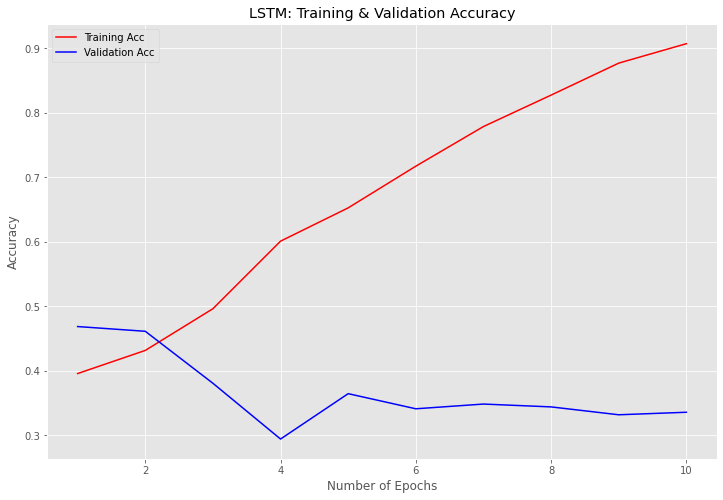

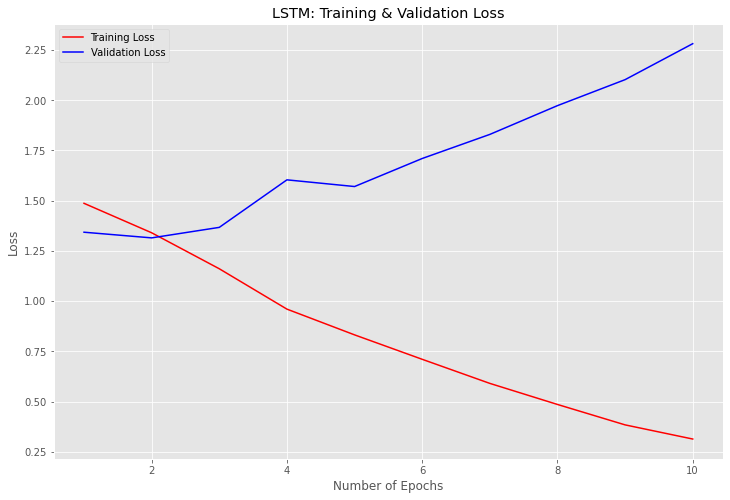

In [71]:
plot_performance(model_lstm.name,hist_lstm.history)

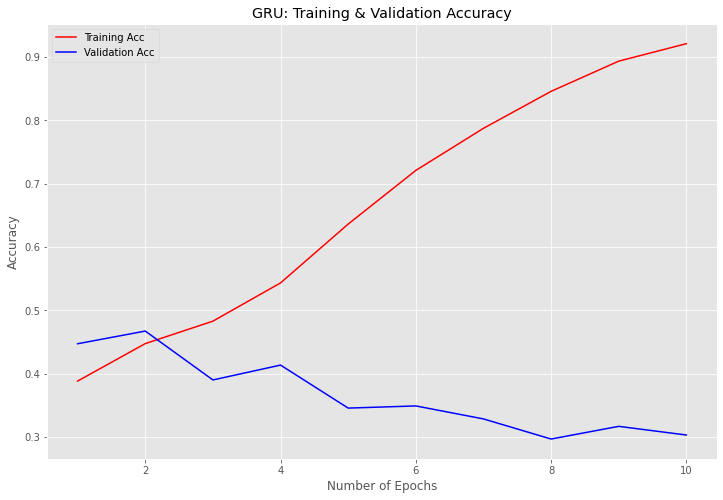

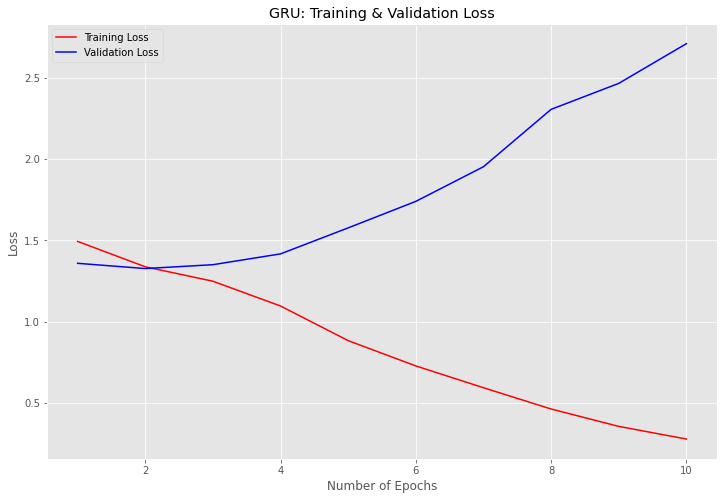

In [72]:
plot_performance(model_gru.name,hist_gru.history)

Apply test data

In [73]:
def test_model(model):
    res = model.evaluate(test_data,test_labels,batch_size=batch_size,verbose=1)
    print(model.name+" Accuracy on Test set: %.3f"%res[1]+"  ~ 3 d.p")

In [74]:
test_model(model_lstm)
test_model(model_gru)

4097/4097 [==============================] - 0s 101us/step
LSTM Accuracy on Test set: 0.378  ~ 3 d.p
4097/4097 [==============================] - 0s 121us/step
GRU Accuracy on Test set: 0.358  ~ 3 d.p
